<a href="https://colab.research.google.com/github/Davichobacter/ds-4geeks/blob/main/Taller_Track_base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una empresa desea optimizar el proceso de compra y venta de articulos, para llevar acabo el analisis se proporciona la basse de datos disponible en linea.

Para cumplir con el objetivo
- Determine cuales son los meses con mas ventas en terminos monetarios.
- Determine cuales son los 5 articulos con mayor margen de contribucion
- Existen diferencias significativas en el inventario para los articulos de "food" y "home"?
- Determine si existen diferencias significativas para cada mes en el inventario de cada una de las categorias ("home", "food" y "health"), ejemplo: para los articulos de "health" en todos los meses se vende lo mismo o no.

## Importar la base de datos y librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = ('https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/inventory-dataset.csv')

In [5]:
df = pd.read_csv(ruta)
df

,product,category,month,quantity,sales,prices,cost
0,J138,food,november,1970,1934,5.805806,4.555314
1,P163,health,october,596,299,21.097080,15.751170
2,A21,home,january,208,60,98.311276,75.949002
3,R11,health,february,603,366,18.343076,13.577373
4,A125,home,april,205,59,97.363540,76.997418
...,...,...,...,...,...,...,...
834,R56,health,january,602,356,21.126296,16.562066
835,I10,home,august,206,51,97.768938,75.375633
836,A83,home,march,206,68,98.606432,76.541633
837,X179,health,november,604,306,20.461548,17.709092


## Meses con mayores ventas (Monetario)

In [7]:
df['total_sales'] = df['sales'] * df['prices']
df

,product,category,month,quantity,sales,prices,cost,total_sales
0,J138,food,november,1970,1934,5.805806,4.555314,11228.429455
1,P163,health,october,596,299,21.097080,15.751170,6308.026917
2,A21,home,january,208,60,98.311276,75.949002,5898.676581
3,R11,health,february,603,366,18.343076,13.577373,6713.565748
4,A125,home,april,205,59,97.363540,76.997418,5744.448844
...,...,...,...,...,...,...,...,...
834,R56,health,january,602,356,21.126296,16.562066,7520.961396
835,I10,home,august,206,51,97.768938,75.375633,4986.215835
836,A83,home,march,206,68,98.606432,76.541633,6705.237406
837,X179,health,november,604,306,20.461548,17.709092,6261.233706


In [8]:
df_ventas_mes = df.groupby('month')['total_sales'].sum().reset_index()
df_ventas_mes

,month,total_sales
0,april,518683.118947
1,august,461432.806026
2,december,573100.330011
3,february,495318.344956
4,january,469329.973231
5,july,483790.993730
6,june,501437.852019
7,march,546491.883825
8,may,574431.055561
9,november,390096.003268


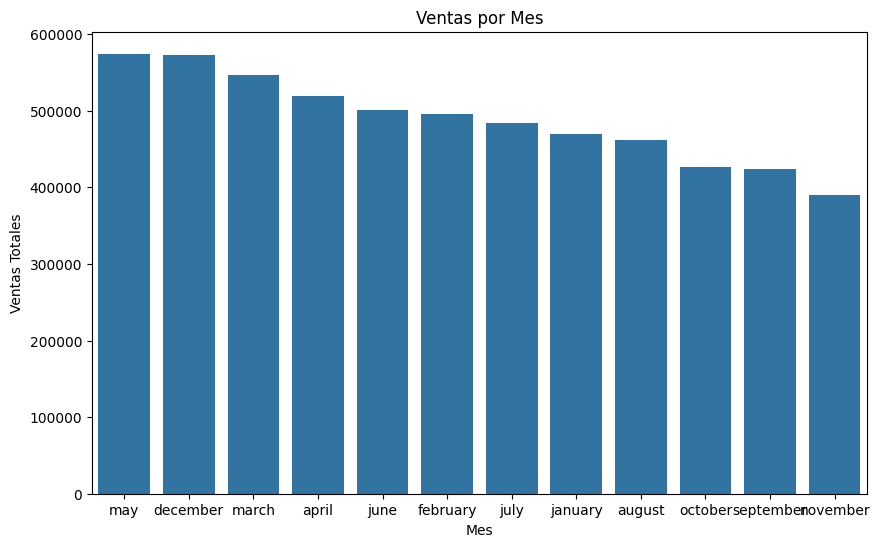

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_sales', data=df_ventas_mes.sort_values(by='total_sales', ascending=False))
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.show()